In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [88]:
ny_crime = pd.read_csv("data/NY-2000-2018.csv")
ny_crime.set_index("YEAR", drop = True, inplace = True)
#ny_crime.sort_values("YEAR", ascending = True, inplace = True)

ny_crime

,ASSAULT,AUTO_THEFT,BURGLARY,LARCENY_THEFT,MURDER,ROBBERY,TOTAL
YEAR,,,,,,,
2015,20270,7332,15125,44005,352,16931,104015
2016,20847,6327,12990,44279,335,15500,100278
2017,20052,5676,12083,43150,292,13956,95209
2018,20208,5428,11687,43558,295,12913,94089


In [65]:
toronto_data = pd.read_csv("data/toronto_crime_basic.csv")
#cols = ["2015","2016","2017","2018"]
#indexes = ["ASSAULT","AUTO-THEFT","BREAK-AND-ENTER","ROOBERY","LARCENY-THEFT","MURDER"]
toronto_data.set_index("YEAR", drop = True, inplace = True)
#toronto_data.sort_values("YEAR", ascending = True, inplace = True)
toronto_data

,ASSAULT,AUTO_THEFT,BURGLARY,LARCENY_THEFT,MURDER,ROBBERY,TOTAL
YEAR,,,,,,,
2015,17762,3209,6900,1026,59,3465,32421
2016,18507,3271,6399,1026,75,3613,32891
2017,18853,3536,6882,1164,65,3908,34408
2018,19327,4674,7551,1224,96,3527,36399


In [66]:
df_total = pd.DataFrame()
df_rate = pd.DataFrame()
df_density = pd.DataFrame()
df_total["Toronto"] = toronto_data["TOTAL"]
df_total["New York"] = ny_crime["TOTAL"]
toronto_area = 243.3 # mi^2 
ny_area = 468 #mi^2
toronto_pop = 2930000
ny_pop = 8623000
df_rate["Toronto Crime Rate"] = df_total["Toronto"]/toronto_pop
df_rate["NY Crime Rate"] = df_total["New York"]/ny_pop

df_density["Toronto Crime Density"] = df_total["Toronto"]/toronto_area
df_density["NY Crime Density"] = df_total["New York"]/ny_area
df_density

,Toronto Crime Density,NY Crime Density
YEAR,,
2015,133.255240,222.254274
2016,135.187012,214.269231
2017,141.422113,203.438034
2018,149.605425,201.044872


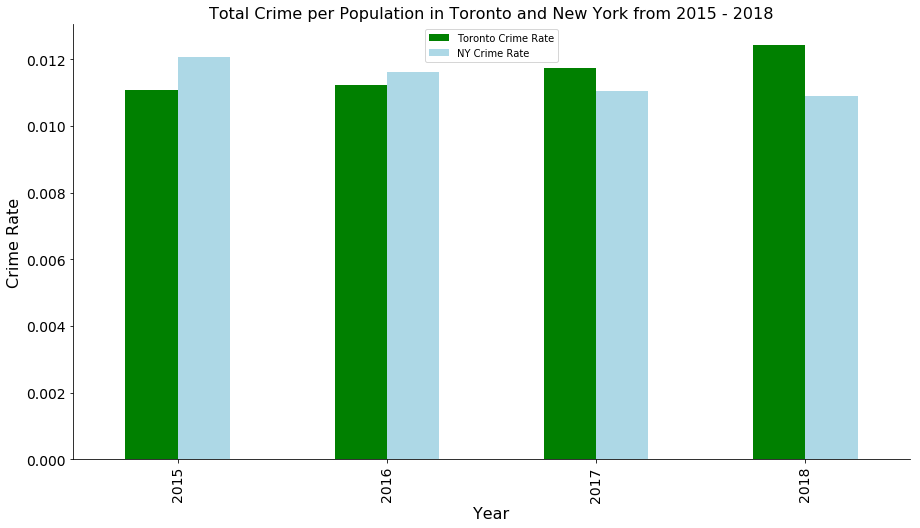

In [67]:
ax = df_rate.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["green", "lightblue"],fontsize = 14 )
#for p in ax.patches:
#    ax.annotate(str(p.get_height())+"%", (p.get_x()+0.001, p.get_height()+1))
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set_yticklabels([])
plt.ylabel("Crime Rate", fontsize = 16)
plt.xlabel("Year", fontsize = 16)
plt.title("Total Crime per Population in Toronto and New York from 2015 - 2018", fontsize = 16)
plt.show()

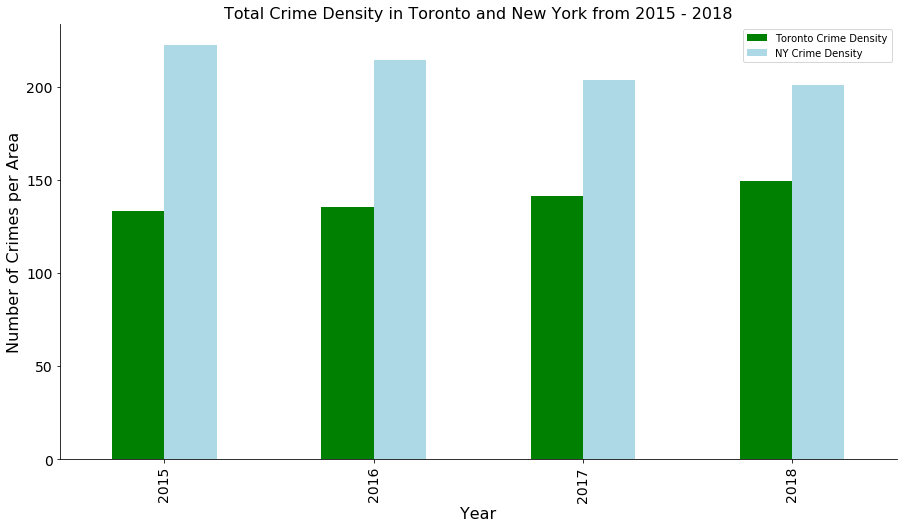

In [68]:
ax = df_density.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["green", "lightblue"],fontsize = 14 )
#for p in ax.patches:
#    ax.annotate(str(p.get_height())+"%", (p.get_x()+0.001, p.get_height()+1))
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set_yticklabels([])
plt.ylabel("Number of Crimes per Area", fontsize = 16)
plt.xlabel("Year", fontsize = 16)
plt.title("Total Crime Density in Toronto and New York from 2015 - 2018", fontsize = 16)
plt.show()

In [69]:
def percent_calculate(df_total_compare):    
    sum_df = df_total_compare.sum(axis=1)
    sum_df = pd.DataFrame(sum_df)
    #sum_df
    df_final = (df_total_compare.values[:,:].transpose()/sum_df.values[:,0])*100
    df_final = pd.DataFrame(df_final.transpose())
    col_names = list(df_total_compare.columns.values)
    row_names = list(df_total_compare.index.values)
    df_final.columns = col_names
    df_final.index = row_names
    df_final = df_final.astype(float).round(2)
    return df_final

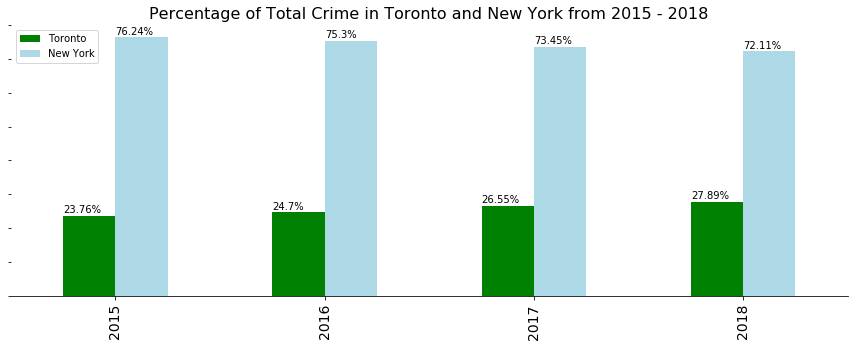

In [70]:
data_final = percent_calculate(df_total)
ax = data_final.plot(kind = 'bar',figsize = (15,5), rot = 90, color = ["green", "lightblue"],fontsize = 14 )
for p in ax.patches:
    ax.annotate(str(p.get_height())+"%", (p.get_x()+0.001, p.get_height()+1))
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yticklabels([])
plt.title("Percentage of Total Crime in Toronto and New York from 2015 - 2018", fontsize = 16)
plt.show()

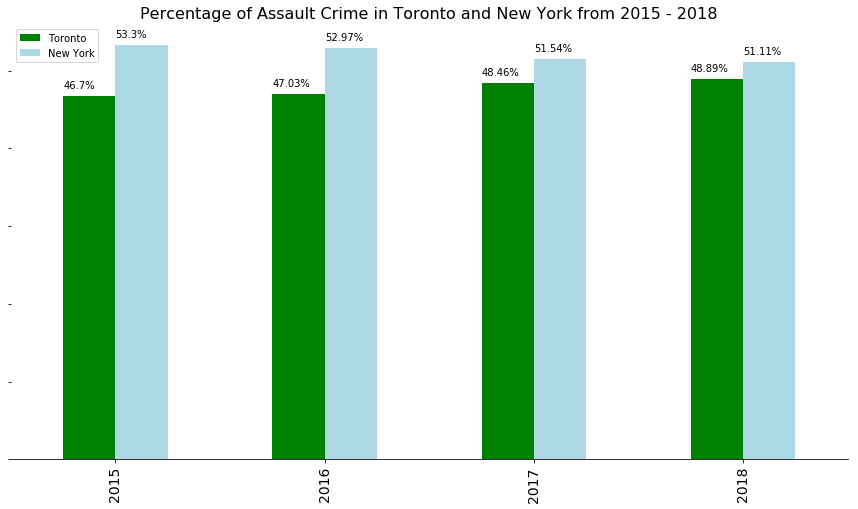

In [71]:
df_assault = pd.DataFrame()
df_assault["Toronto"] = toronto_data["ASSAULT"]
df_assault["New York"] = ny_crime["ASSAULT"]

data_assault = percent_calculate(df_assault)
ax = data_assault.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["green", "lightblue"],fontsize = 14 )
for p in ax.patches:
    ax.annotate(str(p.get_height())+"%", (p.get_x()+0.001, p.get_height()+1))
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yticklabels([])
plt.title("Percentage of Assault Crime in Toronto and New York from 2015 - 2018", fontsize = 16)
plt.show()

In [72]:
overall_compare = pd.DataFrame()
toronto = toronto_data.transpose()
ny = ny_crime.transpose()
overall_compare["Toronto"] = toronto.sum(axis = 1)
overall_compare["New York"] = ny.sum(axis = 1)
del toronto, ny
overall_compare

,Toronto,New York
ASSAULT,74449,81377
AUTO_THEFT,14690,24763
BURGLARY,27732,51885
LARCENY_THEFT,4440,174992
MURDER,295,1274
ROBBERY,14513,59300
TOTAL,136119,393591


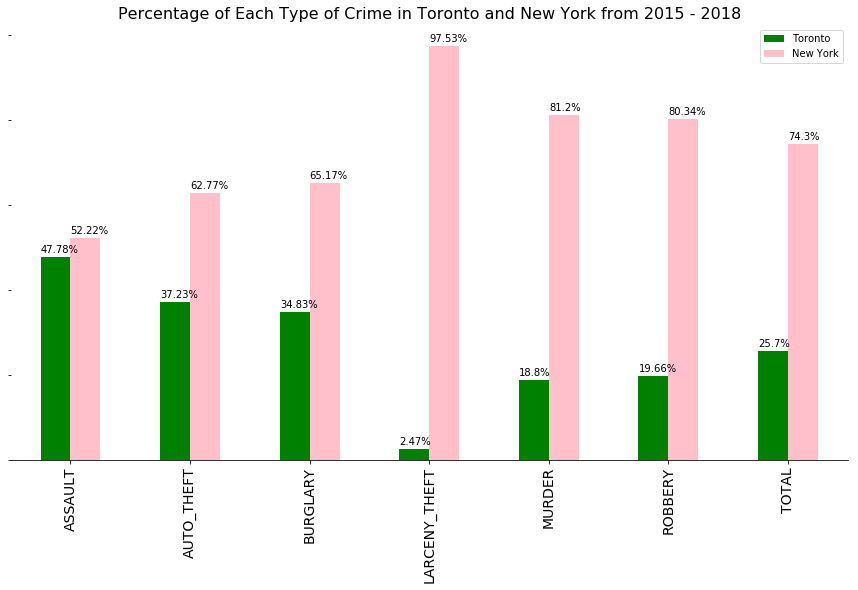

In [73]:
data_overall = percent_calculate(overall_compare)
ax = data_overall.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["green", "pink"],fontsize = 14 )
for p in ax.patches:
    ax.annotate(str(p.get_height())+"%", (p.get_x()+0.001, p.get_height()+1))
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_yticklabels([])
plt.title("Percentage of Each Type of Crime in Toronto and New York from 2015 - 2018", fontsize = 16)
plt.show()

In [74]:
ny_collision = pd.read_csv("data/ny_collision_basic.csv")
ny_collision.drop(columns = ["UNIQUE KEY","LATITUDE", "LONGITUDE"] , inplace = True)
ny_collision["YEAR"] = pd.to_datetime(ny_collision["YEAR"])
ny_collision["YEAR"] = ny_collision["YEAR"].dt.year
ny_collision.sort_values(by = ["YEAR"], inplace = True)
ny_collision.set_index("YEAR",drop = True, inplace = True)
ny_collision["TOTAL"] = ny_collision.sum(axis = 1)
ny_collision.head()

,BOROUGH,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,TOTAL
YEAR,,,,,,,,,,
2015,QUEENS,0,0,0,0,0,0,0,0,0
2015,QUEENS,0,0,0,0,0,0,0,0,0
2015,BROOKLYN,0,0,0,0,0,0,0,0,0
2015,QUEENS,0,0,0,0,0,0,0,0,0
2015,QUEENS,0,0,0,0,0,0,0,0,0


In [75]:
ny_collision.reset_index(level = 0, inplace = True)
ny_collision.head()

,YEAR,BOROUGH,PERSONS INJURED,PERSONS KILLED,PEDESTRIANS INJURED,PEDESTRIANS KILLED,CYCLISTS INJURED,CYCLISTS KILLED,MOTORISTS INJURED,MOTORISTS KILLED,TOTAL
0,2015,QUEENS,0,0,0,0,0,0,0,0,0
1,2015,QUEENS,0,0,0,0,0,0,0,0,0
2,2015,BROOKLYN,0,0,0,0,0,0,0,0,0
3,2015,QUEENS,0,0,0,0,0,0,0,0,0
4,2015,QUEENS,0,0,0,0,0,0,0,0,0


In [76]:
ny_collision_summary = pd.DataFrame()
ny_collision_summary["YEAR"] = ny_collision["YEAR"]
ny_collision_summary["BOROUGH"] = ny_collision["BOROUGH"]
ny_collision_summary["TOTAL"] = ny_collision["TOTAL"]

In [77]:
new_york_traffic = ny_collision_summary.groupby(["YEAR","BOROUGH"]).agg(["count"])
new_york_traffic

TOTAL
                    count
YEAR BOROUGH             
2015 BRONX          21240
     BROOKLYN       50819
     MANHATTAN      42497
     QUEENS         42468
     STATEN ISLAND   6339
2016 BRONX          21677
     BROOKLYN       47656
     MANHATTAN      36726
     QUEENS         41530
     STATEN ISLAND   6717
2017 BRONX           3207
     BROOKLYN        6486
     MANHATTAN       4379
     QUEENS          5657
     STATEN ISLAND    992

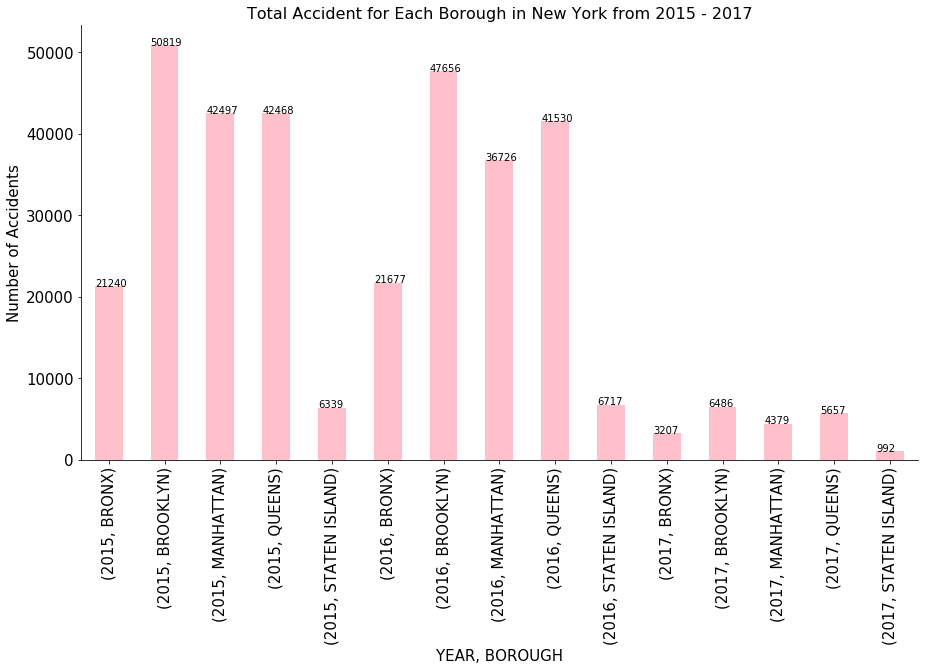

In [78]:
ny_data_traffic = (new_york_traffic)
ax = ny_data_traffic.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["pink"],fontsize = 15 )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.001, p.get_height()))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set_yticklabels([])
ax.get_legend().remove()
plt.ylabel("Number of Accidents", fontsize = 15)
plt.xlabel("YEAR, BOROUGH", fontsize = 15)
plt.title("Total Accident for Each Borough in New York from 2015 - 2017", fontsize = 16)
plt.show()

In [79]:
toronto_collision = pd.read_csv("data/toronto_collision_basic.csv")
list_drop = ["LATITUDE", "LONGITUDE","INJURY","AUTOMOBILE","TRUCK","TRSN_CITY_VEH","EMERG_VEH","AG_DRIV","REDLIGHT","ALCOHOL"]
toronto_collision.drop(columns = list_drop, inplace = True)
remove_indexed = toronto_collision[toronto_collision["YEAR"] < 2015].index
toronto_collision.drop(remove_indexed, inplace = True)
toronto_collision.sort_values(by = ["YEAR"], inplace = True)
toronto_collision.set_index("YEAR", drop = True, inplace = True)
toronto_collision["TOTAL"] = toronto_collision.sum(axis = 1)

toronto_collision.head()

,DISTRICT,PEDESTRIAN,CYCLIST,MOTORCYCLE,PASSENGER,SPEEDING,DISABILITY,TOTAL
YEAR,,,,,,,,
2015,Toronto East York,1,0,0,0,0,0,1
2015,Scarborough,1,0,0,0,0,0,1
2015,Scarborough,1,0,0,0,0,0,1
2015,North York,0,1,0,1,0,0,2
2015,North York,0,1,0,1,0,0,2


In [84]:
toronto_collision.reset_index(inplace = True)

In [85]:
tn_collision_summary = pd.DataFrame()

tn_collision_summary["YEAR"] = toronto_collision["YEAR"]
tn_collision_summary["BOROUGH"] = toronto_collision["DISTRICT"]
tn_collision_summary["TOTAL"] = toronto_collision["TOTAL"]

tn_collision_summary.drop(tn_collision_summary.index[[2596]] , inplace = True)
tn_collision_summary.reset_index(level = 0, drop = True ,inplace = True)
#tn_collision_summary["BOROUGH"].dropna(inplace = True )
tn_collision_summary

,YEAR,BOROUGH,TOTAL
0,2015,Toronto East York,1
1,2015,Scarborough,1
2,2015,Scarborough,1
3,2015,North York,2
4,2015,North York,2
5,2015,North York,2
6,2015,Scarborough,1
7,2015,Scarborough,1
8,2015,Toronto East York,1
9,2015,Etobicoke York,1


In [86]:
toronto_traffic = tn_collision_summary.groupby(["YEAR","BOROUGH"]).agg(["count"])
toronto_traffic

TOTAL
                       count
YEAR BOROUGH                
2015 Etobicoke York      209
     North York          211
     Scarborough         221
     Toronto East York   291
2016 Etobicoke York      234
     North York          218
     Scarborough         237
     Toronto East York   305
2017 Etobicoke York      172
     North York          203
     Scarborough         216
     Toronto East York   232

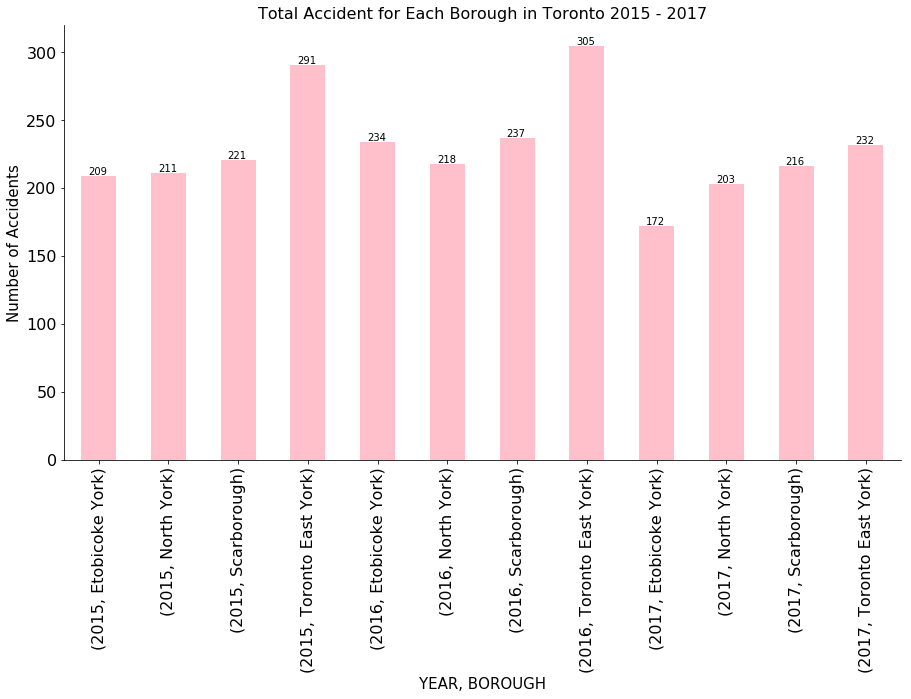

In [87]:
toronto_data_traffic = (toronto_traffic)
ax = toronto_data_traffic.plot(kind = 'bar',figsize = (15,8), rot = 90, color = ["pink"],fontsize = 16 )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.set_yticklabels([])

ax.get_legend().remove()
plt.ylabel("Number of Accidents", fontsize = 15)
plt.xlabel("YEAR, BOROUGH", fontsize = 15)
plt.title("Total Accident for Each Borough in Toronto 2015 - 2017", fontsize = 16)
plt.show()

In [2]:
ny_raw = pd.read_csv("data/nyc_census_tracts.csv")

#drop missing values
ny_raw.dropna(inplace = True)

#drop unnecessary variables
ny_raw.drop(columns = ["CensusTract","IncomeErr","IncomePerCapErr","County","OtherTransp","ChildPoverty","Men","Women","Hispanic","White","Black","Native","Asian","Citizen","Drive","Carpool","Transit","Walk"], inplace = True)

ny_raw

,Borough,TotalPop,Income,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1,Bronx,5403,72034.0,22180.0,20.0,28.7,17.1,23.9,8.0,22.3,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,Bronx,5915,74836.0,27700.0,13.2,32.2,23.4,24.9,9.0,10.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,Bronx,5879,32312.0,17526.0,26.3,19.1,36.1,26.2,4.9,13.8,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,Bronx,2591,37936.0,17986.0,37.1,35.4,20.9,26.2,6.6,11.0,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2
5,Bronx,8516,18086.0,12023.0,53.2,14.5,41.1,16.7,7.1,20.6,0.0,46.0,2508,71.0,21.3,7.7,0.0,17.2
6,Bronx,4774,14479.0,9781.0,54.2,20.8,36.0,33.7,3.4,6.1,4.1,42.7,1191,74.2,16.1,9.7,0.0,18.9
8,Bronx,5355,17226.0,11493.0,50.5,15.9,36.6,24.2,8.6,14.7,2.7,35.5,1691,85.1,8.3,6.1,0.5,9.4
9,Bronx,3016,20153.0,10317.0,52.6,19.9,35.9,25.8,4.9,13.5,1.6,42.8,1102,86.9,8.5,4.5,0.0,15.2
10,Bronx,4778,17147.0,8911.0,52.7,15.2,46.4,25.0,1.7,11.6,0.5,44.0,1559,75.0,14.0,11.0,0.0,10.6
11,Bronx,5299,49529.0,26652.0,8.5,36.6,24.4,26.6,4.9,7.4,2.7,47.3,2394,61.9,37.4,0.6,0.0,12.8


In [3]:
#ny_raw.to_csv("nyc_census_basic.csv")
#ny_raw.corr()
df_explore = pd.DataFrame()
df_explore["POPULATION"] = ny_raw["TotalPop"]
df_explore["INCOME"] = ny_raw["Income"]
df_explore["UNEMPLOYMENT"] = ny_raw["Unemployment"]
df_explore["POVERTY"] = ny_raw["Poverty"]
df_explore.corr()

,POPULATION,INCOME,UNEMPLOYMENT,POVERTY
POPULATION,1.000000,-0.077731,0.019690,0.156224
INCOME,-0.077731,1.000000,-0.507329,-0.735162
UNEMPLOYMENT,0.019690,-0.507329,1.000000,0.516265
POVERTY,0.156224,-0.735162,0.516265,1.000000


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 256201.0231182464)

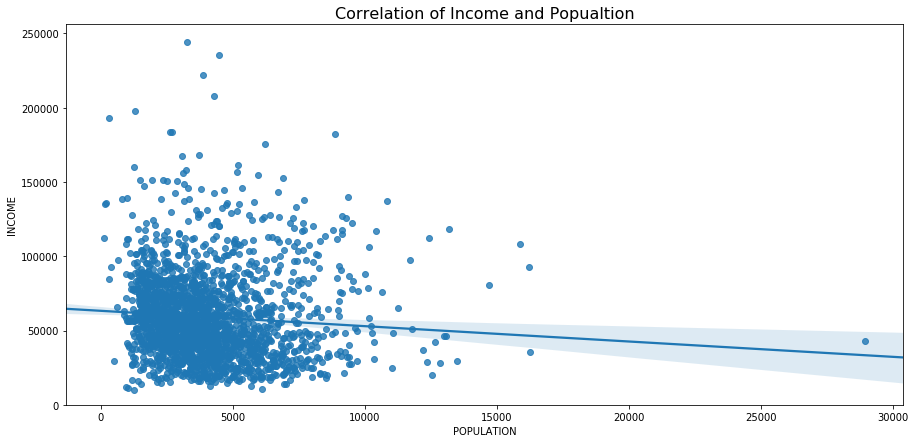

In [4]:
fig = sns.regplot(x = "POPULATION" , y = "INCOME", data = df_explore)
fig.figure.set_size_inches(15,7)
plt.title("Correlation of Income and Popualtion", fontsize = 16)
plt.ylim(0,)

(0, 75.00265309696167)

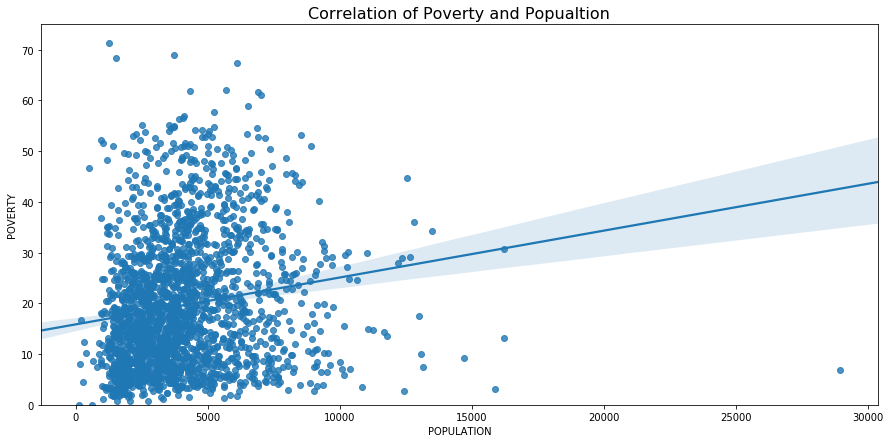

In [5]:
fig = sns.regplot(x = "POPULATION" , y = "POVERTY", data = df_explore)
fig.figure.set_size_inches(15,7)
plt.title("Correlation of Poverty and Popualtion", fontsize = 16)
plt.ylim(0,)

(0, 65.85131630880315)

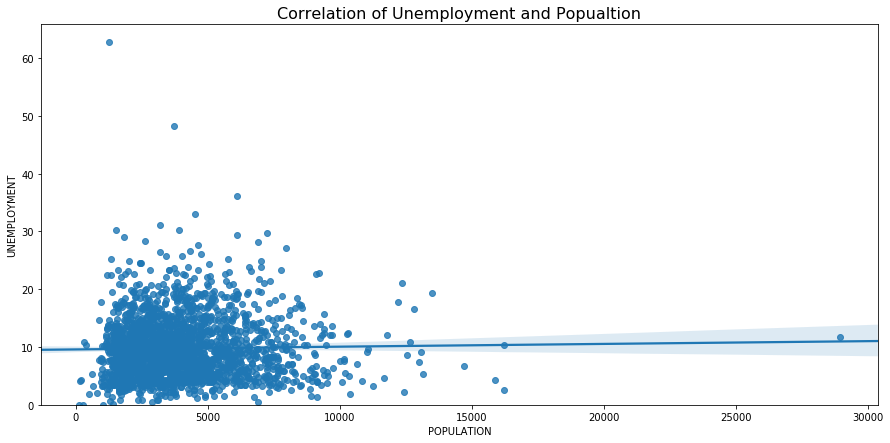

In [6]:
fig = sns.regplot(x = "POPULATION" , y = "UNEMPLOYMENT", data = df_explore)
fig.figure.set_size_inches(15,7)
plt.title("Correlation of Unemployment and Popualtion", fontsize = 16)
plt.ylim(0,)

In [7]:
ny_population = pd.DataFrame()
ny_population["BOROUGH"] = ny_raw["Borough"]
ny_population["TOTAL POPULATION"] = ny_raw["TotalPop"]
ny_population.head()

,BOROUGH,TOTAL POPULATION
1,Bronx,5403
2,Bronx,5915
3,Bronx,5879
4,Bronx,2591
5,Bronx,8516


In [8]:
ny_population = ny_population.groupby("BOROUGH").sum()
ny_population

,TOTAL POPULATION
BOROUGH,
Bronx,1418542
Brooklyn,2593160
Manhattan,1614551
Queens,2298378
Staten Island,472442


Text(0.5, 0, 'Number of people')

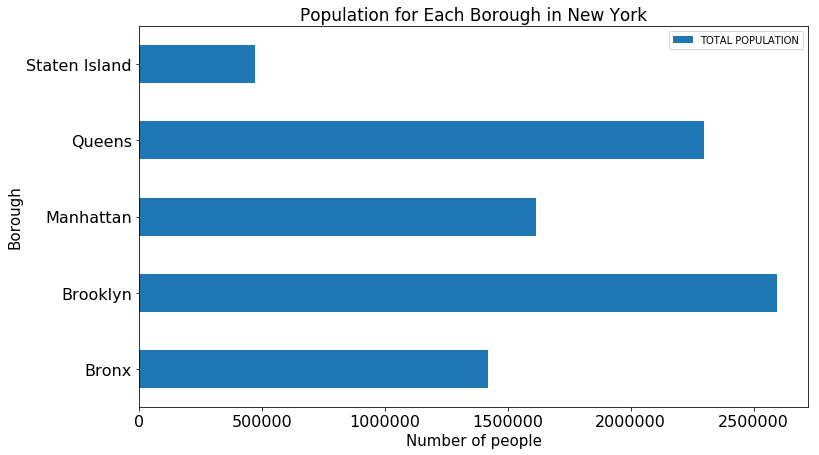

In [9]:
ny_population.plot(kind = "barh", figsize = (12,7), fontsize = 16)
plt.title("Population for Each Borough in New York", fontsize = 17)
plt.ylabel("Borough", fontsize = 15)
plt.xlabel("Number of people", fontsize = 15)

In [10]:
mean_ny = ny_raw.groupby("Borough").mean()
mean_ny.head()

,TotalPop,Income,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Borough,,,,,,,,,,,,,,,,,
Bronx,4338.048930,39255.256881,19378.902141,29.585321,24.471560,33.178287,24.132416,7.146789,11.069419,3.265138,42.632416,1722.259939,80.162691,14.501835,5.214679,0.119572,13.907645
Brooklyn,3466.791444,54264.913102,27863.969251,21.550802,37.320989,24.286631,23.044519,6.480882,8.870722,3.705481,41.889572,1560.727273,78.742914,14.960695,6.196658,0.098396,9.985294
Manhattan,5914.106227,83618.146520,68921.120879,17.412821,58.037363,14.661538,20.938095,2.057143,4.308791,6.826007,30.898535,3209.542125,83.097802,8.964103,7.768864,0.169963,7.645421
Queens,3591.215625,62389.365625,27505.464062,14.073594,32.312188,24.473125,24.290781,8.242188,10.681875,2.491094,42.910625,1725.756250,79.285312,14.391875,6.189375,0.133594,8.749062
Staten Island,4415.345794,72021.233645,31905.570093,13.288785,38.300000,20.535514,24.216822,8.742991,8.195327,2.482243,42.185047,1954.000000,74.235514,21.325234,4.374766,0.069159,7.217757


In [11]:
mean_ny.corr()

,TotalPop,Income,IncomePerCap,Poverty,Professional,Service,Office,Construction,Production,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.625441,0.857429,-0.057373,0.751679,-0.591306,-0.748372,-0.782947,-0.816069,0.817822,-0.893828,0.949722,0.488446,-0.498494,0.474574,0.566451,-0.282466
Income,0.625441,1.000000,0.843743,-0.785247,0.888362,-0.977967,-0.605276,-0.486910,-0.845809,0.532390,-0.711293,0.775455,0.075454,-0.186835,0.447509,0.295439,-0.920050
IncomePerCap,0.857429,0.843743,1.000000,-0.352857,0.970581,-0.866703,-0.914913,-0.874989,-0.956095,0.899789,-0.976899,0.970492,0.543640,-0.620644,0.754727,0.650628,-0.586585
Poverty,-0.057373,-0.785247,-0.352857,1.000000,-0.454289,0.726264,0.046454,-0.106939,0.357039,0.069150,0.146909,-0.245531,0.361697,-0.245992,-0.065653,0.085464,0.943055
Professional,0.751679,0.888362,0.970581,-0.454289,1.000000,-0.939299,-0.898891,-0.810758,-0.981776,0.840741,-0.917160,0.893496,0.399153,-0.499038,0.703559,0.495004,-0.700534
Service,-0.591306,-0.977967,-0.866703,0.726264,-0.939299,1.000000,0.700214,0.565954,0.896961,-0.606374,0.745222,-0.763573,-0.124242,0.245796,-0.528067,-0.293531,0.902798
Office,-0.748372,-0.605276,-0.914913,0.046454,-0.898891,0.700214,1.000000,0.976579,0.896741,-0.981850,0.952620,-0.858612,-0.697417,0.761364,-0.851886,-0.675111,0.331602
Construction,-0.782947,-0.486910,-0.874989,-0.106939,-0.810758,0.565954,0.976579,1.000000,0.815898,-0.997070,0.949473,-0.859317,-0.813722,0.851143,-0.865664,-0.776598,0.163031
Production,-0.816069,-0.845809,-0.956095,0.357039,-0.981776,0.896961,0.896741,0.815898,1.000000,-0.853105,0.920436,-0.904453,-0.355740,0.440998,-0.614739,-0.422380,0.632703
WorkAtHome,0.817822,0.532390,0.899789,0.069150,0.840741,-0.606374,-0.981850,-0.997070,-0.853105,1.000000,-0.965878,0.886929,0.771877,-0.812157,0.837531,0.745054,-0.208611


In [12]:
#del ny_income
ny_income = pd.DataFrame()
ny_prosper = pd.DataFrame()
ny_job = pd.DataFrame()

mean_ny.reset_index(drop = False, inplace = True)

ny_income["BOROUGH"] = mean_ny["Borough"]
ny_income["INCOME"] = mean_ny["Income"]
#ny_income["POVERTY"] = mean_ny["Poverty"]

ny_prosper["BOROUGH"] = mean_ny["Borough"]
ny_prosper["POVERTY"] = mean_ny["Poverty"]
ny_prosper["UNEMPLOYMENT"] = mean_ny["Unemployment"]

ny_job["BOROUGH"] = mean_ny["Borough"]
ny_job["OFFICE"] = mean_ny["Office"]
ny_job["PROFESSIONAL"] = mean_ny["Professional"]
ny_job["CONSTRUCTION"] = mean_ny["Construction"]
ny_job["PRODUCTION"] = mean_ny["Production"]
ny_job["SERVICE"] = mean_ny["Service"]

ny_income.set_index("BOROUGH", inplace = True)
ny_prosper.set_index("BOROUGH", inplace = True)
ny_job.set_index("BOROUGH", inplace = True)

ny_job.corr()

,OFFICE,PROFESSIONAL,CONSTRUCTION,PRODUCTION,SERVICE
OFFICE,1.000000,-0.898891,0.976579,0.896741,0.700214
PROFESSIONAL,-0.898891,1.000000,-0.810758,-0.981776,-0.939299
CONSTRUCTION,0.976579,-0.810758,1.000000,0.815898,0.565954
PRODUCTION,0.896741,-0.981776,0.815898,1.000000,0.896961
SERVICE,0.700214,-0.939299,0.565954,0.896961,1.000000


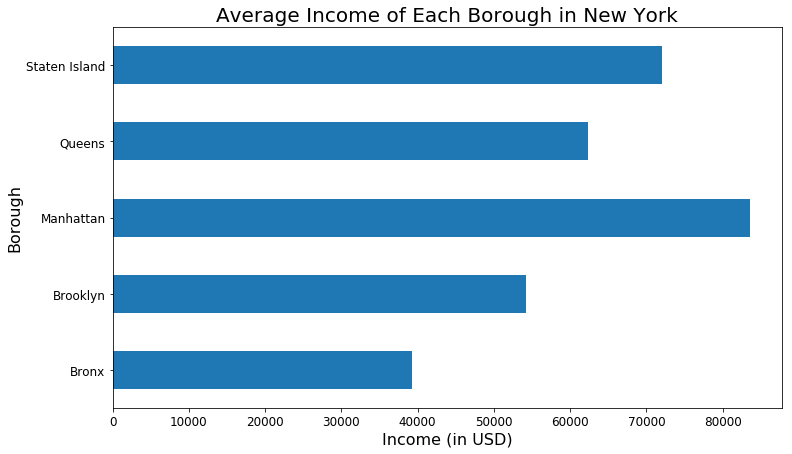

In [13]:
ny_income["INCOME"].plot(kind = "barh", figsize = (12,7), fontsize = 12)
plt.title("Average Income of Each Borough in New York", fontsize = 20)
plt.xlabel("Income (in USD)", fontsize = 16)
plt.ylabel("Borough",fontsize = 16)
plt.show()

In [30]:
ny_income_rate = pd.DataFrame()
ny_income_rate = ny_income[["INCOME"]].div(ny_population["TOTAL POPULATION"], axis=0)
ny_income_rate.rename(index = str, columns = {"INCOME": "AVERAGE INCOME RATE"}, inplace = True)
ny_income_rate

,AVERAGE INCOME RATE
BOROUGH,
Bronx,0.027673
Brooklyn,0.020926
Manhattan,0.051790
Queens,0.027145
Staten Island,0.152445


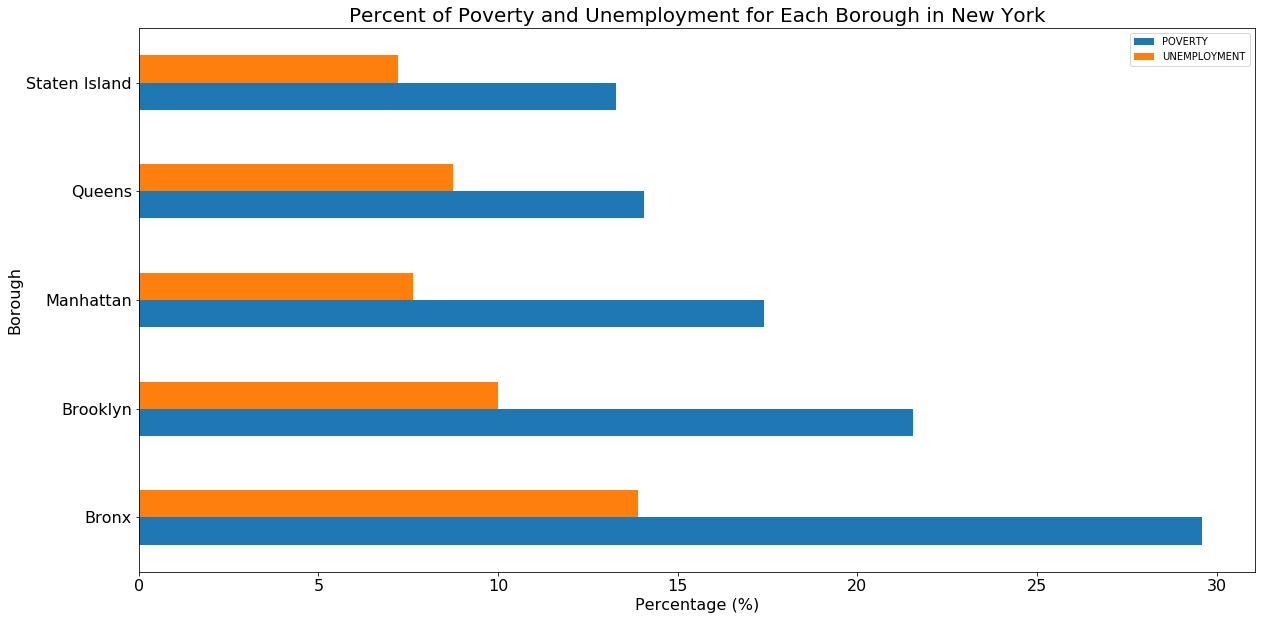

In [24]:
ny_prosper.plot(kind = "barh" , figsize=(20, 10), fontsize = 16)
plt.title("Percent of Poverty and Unemployment for Each Borough in New York", fontsize = 20)
plt.xlabel("Percentage (%)", fontsize = 16)
plt.ylabel("Borough",fontsize = 16)
plt.show()

In [80]:
ny_job

,OFFICE,PROFESSIONAL,CONSTRUCTION,PRODUCTION,SERVICE
BOROUGH,,,,,
Bronx,24.132416,24.471560,7.146789,11.069419,33.178287
Brooklyn,23.044519,37.320989,6.480882,8.870722,24.286631
Manhattan,20.938095,58.037363,2.057143,4.308791,14.661538
Queens,24.290781,32.312188,8.242188,10.681875,24.473125
Staten Island,24.216822,38.300000,8.742991,8.195327,20.535514


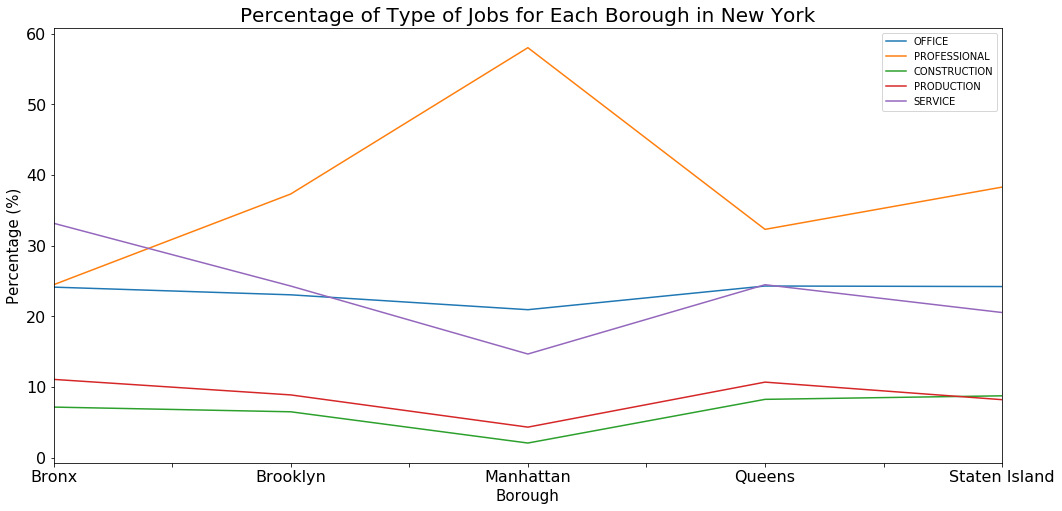

In [108]:
ny_job.plot(kind = "line", alpha = 1 ,stacked = False , figsize = (17,8), fontsize = 16)
plt.title("Percentage of Type of Jobs for Each Borough in New York", fontsize = 20)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.xlabel("Borough",fontsize = 15)
plt.show()

In [3]:
toronto_pop = pd.read_csv("toronto_population.csv")
toronto_pop.sort_values("BOROUGH")
toronto_pop.set_index("BOROUGH", drop = True, inplace = True)

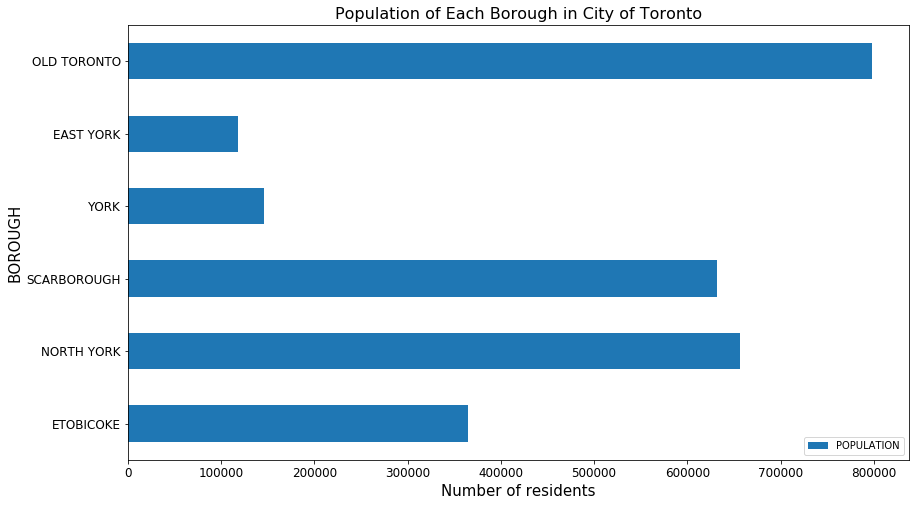

In [29]:
ax = toronto_pop.plot(kind = "barh", figsize = (14,8), fontsize = 12)

plt.ylabel("BOROUGH", fontsize = 15)
plt.xlabel("Number of residents", fontsize = 15)
plt.title("Population of Each Borough in City of Toronto", fontsize = 16)
plt.show()

In [33]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [34]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [35]:
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [36]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [40]:
island_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
island_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [42]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="island_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

GeocoderUnavailable: Service not available

In [43]:
# create map of Manhattan using latitude and longitude values
map_island = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(island_data['Latitude'], island_data['Longitude'], island_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_island)  
    
map_island

In [47]:
CLIENT_ID = 'N5A1YS05VKIM2AAPEAWLAVMRW0P5VWA0MN2W4VYKJLYURAA1' # your Foursquare ID
CLIENT_SECRET = '1A1UD0PX2JQNUOHNDM2FUCPYP2H5VANXYKJU4QNWJYO4UR0D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N5A1YS05VKIM2AAPEAWLAVMRW0P5VWA0MN2W4VYKJLYURAA1
CLIENT_SECRET:1A1UD0PX2JQNUOHNDM2FUCPYP2H5VANXYKJU4QNWJYO4UR0D


## Explore Staten Island

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
island_venues = getNearbyVenues(names=island_data['Neighborhood'],
                                   latitudes=island_data['Latitude'],
                                   longitudes=island_data['Longitude']
                                  )


St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [50]:
island_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,9,9,9,9,9,9
Arden Heights,4,4,4,4,4,4
Arlington,6,6,6,6,6,6
Arrochar,20,20,20,20,20,20
Bay Terrace,11,11,11,11,11,11
Bloomfield,5,5,5,5,5,5
Bulls Head,46,46,46,46,46,46
Butler Manor,6,6,6,6,6,6
Castleton Corners,15,15,15,15,15,15


In [51]:
# one hot encoding
island_onehot = pd.get_dummies(island_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
island_onehot['Neighborhood'] = island_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [island_onehot.columns[-1]] + list(island_onehot.columns[:-1])
island_onehot = island_onehot[fixed_columns]

island_onehot.head(10)

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,St. George,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,St. George,0,0,0,0,0,0

In [53]:
island_grouped = island_onehot.groupby('Neighborhood').mean().reset_index()
island_grouped

,Neighborhood,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Caribbean Restaurant,Casino,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Liquor Store,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightlife Spot,Optical Shop,Other Repair Shop,Outdoors & Recreation,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Taxi Stand,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toll Plaza,Tourist Information Center,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store
0,Annadale,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.111111,0.0,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = island_grouped['Neighborhood']

for ind in np.arange(island_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(island_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annadale,Pizza Place,Food,Sports Bar,Restaurant,Train Station,Diner,Pharmacy,Park,Donut Shop,Fast Food Restaurant
1,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
2,Arlington,Deli / Bodega,Grocery Store,Food,Bus Stop,Boat or Ferry,American Restaurant,Dim Sum Restaurant,Falafel Restaurant,Food Truck,Food & Drink Shop
3,Arrochar,Deli / Bodega,Bus Stop,Pizza Place,Italian Restaurant,Sandwich Place,Outdoors & Recreation,Middle Eastern Restaurant,Supermarket,Liquor Store,Bagel Shop
4,Bay Terrace,Supermarket,Italian Restaurant,Liquor Store,Shipping Store,Playground,Insurance Office,Train Station,Sushi Restaurant,Donut Shop,Salon / Barbershop


In [56]:
# set number of clusters
kclusters = 5

island_grouped_clustering = island_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(island_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 2, 2, 0, 2, 1, 2, 2], dtype=int32)

In [57]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

island_merged = island_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
island_merged = island_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

island_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Staten Island,St. George,40.644982,-74.079353,2,Bar,Italian Restaurant,Pizza Place,Theater,Bus Station,Scenic Lookout,Donut Shop,Steakhouse,Baseball Stadium,Bakery
1,Staten Island,New Brighton,40.640615,-74.087017,0,Bus Stop,Deli / Bodega,Park,Bowling Alley,Discount Store,Playground,Convenience Store,Health & Beauty Service,Dry Cleaner,Fast Food Restaurant
2,Staten Island,Stapleton,40.626928,-74.077902,2,Bus Stop,Mexican Restaurant,Sandwich Place,Discount Store,Bank,Pizza Place,Fast Food Restaurant,Spanish Restaurant,Breakfast Spot,Deli / Bodega
3,Staten Island,Rosebank,40.615305,-74.069805,2,Pharmacy,Mexican Restaurant,Italian Restaurant,Grocery Store,Cajun / Creole Restaurant,Beach,Donut Shop,Sandwich Place,Gourmet Shop,Filipino Restaurant
4,Staten Island,West Brighton,40.631879,-74.107182,2,Coffee Shop,Italian Restaurant,American Restaurant,Pharmacy,Bar,Music Store,Juice Bar,Bus Stop,German Restaurant,Board Shop


In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(island_merged['Latitude'], island_merged['Longitude'], island_merged['Neighborhood'], island_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:
island_merged.loc[island_merged['Cluster Labels'] == 0, island_merged.columns[[1] + list(range(5, island_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,New Brighton,Bus Stop,Deli / Bodega,Park,Bowling Alley,Discount Store,Playground,Convenience Store,Health & Beauty Service,Dry Cleaner,Fast Food Restaurant
24,Park Hill,Bus Stop,Gym / Fitness Center,Hotel,Coffee Shop,Athletics & Sports,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
41,Arden Heights,Pharmacy,Coffee Shop,Pizza Place,Bus Stop,Dry Cleaner,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
45,Bloomfield,Theme Park,Discount Store,Park,Bus Stop,Recreation Center,Dessert Shop,Dim Sum Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant
52,Randall Manor,Bus Stop,Deli / Bodega,Playground,Pizza Place,Park,Bagel Shop,Eastern European Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant
56,Willowbrook,Bus Stop,Chinese Restaurant,Pizza Place,Bagel Shop,Women's Store,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant
62,Fox Hills,Bus Stop,American Restaurant,Food,Sandwich Place,Women's Store,Eastern European Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [60]:
island_merged.loc[island_merged['Cluster Labels'] == 1, island_merged.columns[[1] + list(range(5, island_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Grymes Hill,Dog Run,Moving Target,Video Store,Basketball Court,Bus Stop,Women's Store,Electronics Store,Food,Flower Shop,Filipino Restaurant
8,Port Richmond,Food Truck,Rental Car Location,Bus Stop,Pizza Place,Automotive Shop,Martial Arts Dojo,Donut Shop,Basketball Court,Bar,Electronics Store
15,Oakwood,Women's Store,Playground,Bar,Bus Stop,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
22,Silver Lake,American Restaurant,Art Gallery,Burger Joint,Golf Course,Women's Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Filipino Restaurant
25,Westerleigh,Convenience Store,Arcade,Eastern European Restaurant,Food & Drink Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space
26,Graniteville,Supermarket,Food Truck,Dance Studio,Deli / Bodega,Food & Drink Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
32,Midland Beach,Restaurant,Beach,Bus Stop,Deli / Bodega,Dessert Shop,Other Repair Shop,Bookstore,Electronics Store,Falafel Restaurant,Food
38,Butler Manor,Pool,Baseball Field,Convenience Store,Bus Stop,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
42,Greenridge,Pub,Bowling Alley,Diner,Playground,Pizza Place,Bus Stop,Women's Store,Eastern European Restaurant,Filipino Restaurant,Fast Food Restaurant
44,Chelsea,Arts & Crafts Store,Sandwich Place,Bus Stop,Steakhouse,Women's Store,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant


In [61]:
island_merged.loc[island_merged['Cluster Labels'] == 2, island_merged.columns[[1] + list(range(5, island_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St. George,Bar,Italian Restaurant,Pizza Place,Theater,Bus Station,Scenic Lookout,Donut Shop,Steakhouse,Baseball Stadium,Bakery
2,Stapleton,Bus Stop,Mexican Restaurant,Sandwich Place,Discount Store,Bank,Pizza Place,Fast Food Restaurant,Spanish Restaurant,Breakfast Spot,Deli / Bodega
3,Rosebank,Pharmacy,Mexican Restaurant,Italian Restaurant,Grocery Store,Cajun / Creole Restaurant,Beach,Donut Shop,Sandwich Place,Gourmet Shop,Filipino Restaurant
4,West Brighton,Coffee Shop,Italian Restaurant,American Restaurant,Pharmacy,Bar,Music Store,Juice Bar,Bus Stop,German Restaurant,Board Shop
7,South Beach,Pier,Deli / Bodega,Beach,Athletics & Sports,Eastern European Restaurant,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
9,Mariner's Harbor,Deli / Bodega,Italian Restaurant,Nightlife Spot,Other Repair Shop,Pizza Place,Bus Stop,Electronics Store,Flower Shop,Filipino Restaurant,Fast Food Restaurant
11,Castleton Corners,Pizza Place,Bank,Park,Tattoo Parlor,Bar,Bagel Shop,Grocery Store,Sandwich Place,Mini Golf,Japanese Restaurant
12,New Springville,Bagel Shop,Chinese Restaurant,Mobile Phone Shop,Accessories Store,Pharmacy,Shopping Mall,Sandwich Place,Restaurant,Coffee Shop,Deli / Bodega
13,Travis,Hotel,Deli / Bodega,Bowling Alley,Baseball Field,Gym / Fitness Center,Gym,Park,Donut Shop,Spanish Restaurant,Sports Club
14,New Dorp,Italian Restaurant,Pizza Place,Indian Restaurant,Bank,Gas Station,Mexican Restaurant,Dim Sum Restaurant,Dessert Shop,Deli / Bodega,Coffee Shop


In [62]:
island_merged.loc[island_merged['Cluster Labels'] == 3, island_merged.columns[[1] + list(range(5, island_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Port Ivory,Bar,Women's Store,French Restaurant,Food & Drink Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space


In [63]:
island_merged.loc[island_merged['Cluster Labels'] == 4, island_merged.columns[[1] + list(range(5, island_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Todt Hill,Park,Women's Store,Ice Cream Shop,Food,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Event Space,Electronics Store
